In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelBinarizer

In [2]:
df = pd.read_csv('DataTable.csv')
#walkability_df = pd.read_csv('walkability_scores.csv')
#walkability_df.head()
#df = pd.concat([data, walkability_df], axis=1)

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'distance_to_airport',
       'distance_to_seahawks_stadium', 'distance_to_seattle_center',
       'distance_to_kerry_park', 'distance_to_discovery_park',
       'minimum_distance_to_metro', 'population', 'land', 'population_density',
       'units', 'units_occupied', 'med_value', 'med_income', 'calc_pd',
       'walk_score'],
      dtype='object')

In [4]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,minimum_distance_to_metro,population,land,population_density,units,units_occupied,med_value,med_income,calc_pd,walk_score
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1.302968,24092,4.85,4966,9290,8668,283100.0,58707.0,4967.42268,39
1,4060000240,2014-06-23,205425.0,2,1.00,880,6780,1.0,0.0,0.0,...,2.089548,24092,4.85,4966,9290,8668,283100.0,58707.0,4967.42268,62
2,4058801670,2014-07-17,445000.0,3,2.25,2100,8201,1.0,0.0,2.0,...,1.894527,24092,4.85,4966,9290,8668,283100.0,58707.0,4967.42268,23
3,2976800796,2014-09-25,236000.0,3,1.00,1300,5898,1.0,0.0,0.0,...,1.643102,24092,4.85,4966,9290,8668,283100.0,58707.0,4967.42268,29
4,6874200960,2015-02-27,170000.0,2,1.00,860,5265,1.0,0.0,0.0,...,1.264256,24092,4.85,4966,9290,8668,283100.0,58707.0,4967.42268,80
5,4268200055,2015-01-05,245000.0,3,1.75,1740,11547,1.0,0.0,0.0,...,3.383188,24092,4.85,4966,9290,8668,283100.0,58707.0,4967.42268,56
6,3969300030,2014-07-23,165000.0,4,1.00,1000,7134,1.0,0.0,0.0,...,2.867796,24092,4.85,4966,9290,8668,283100.0,58707.0,4967.42268,87
7,1678400105,2015-12-02,339000.0,4,1.50,2390,7480,1.5,0.0,2.0,...,2.762407,24092,4.85,4966,9290,8668,283100.0,58707.0,4967.42268,41
8,2172000075,2014-06-23,290900.0,2,2.00,1610,17600,2.0,0.0,0.0,...,1.807454,24092,4.85,4966,9290,8668,283100.0,58707.0,4967.42268,47
9,1180003090,2014-06-09,190000.0,2,1.00,630,6000,1.0,0.0,0.0,...,3.237158,24092,4.85,4966,9290,8668,283100.0,58707.0,4967.42268,19


In [5]:
#drop columns that won't be useful or are repeated
df.drop(columns=['id', 'date', 'zipcode', 'lat', 'long', 'units', 'population', 
                 'units_occupied', 'med_value', 'population_density', 'land'], inplace=True)

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,distance_to_airport,distance_to_seahawks_stadium,distance_to_seattle_center,distance_to_kerry_park,distance_to_discovery_park,minimum_distance_to_metro,med_income,calc_pd,walk_score
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,5650,4.862539,6.771217,8.837087,9.483657,12.249694,1.302968,58707.0,4967.42268,39
1,205425.0,2,1.00,880,6780,1.0,0.0,0.0,4,6,...,6780,4.514162,7.598140,9.663983,10.310590,13.074902,2.089548,58707.0,4967.42268,62
2,445000.0,3,2.25,2100,8201,1.0,0.0,2.0,3,8,...,8712,5.076186,7.222682,9.278340,9.927283,12.720516,1.894527,58707.0,4967.42268,23
3,236000.0,3,1.00,1300,5898,1.0,0.0,0.0,3,7,...,7619,4.564977,7.170015,9.237631,9.883293,12.639671,1.643102,58707.0,4967.42268,29
4,170000.0,2,1.00,860,5265,1.0,0.0,0.0,3,6,...,8775,4.147126,6.839175,8.907012,9.545065,12.244964,1.264256,58707.0,4967.42268,80


In [6]:
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,distance_to_airport,distance_to_seahawks_stadium,distance_to_seattle_center,distance_to_kerry_park,distance_to_discovery_park,minimum_distance_to_metro,med_income,calc_pd,walk_score
count,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,...,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,0.233987,3.410784,7.662792,...,12775.718161,13.330562,11.408495,12.013397,12.284533,13.983176,6.970616,81151.809944,4294.850826,40.003361
std,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.765437,0.650035,1.171971,...,27345.621867,5.912335,6.406267,7.098593,7.323247,8.042231,4.979949,24184.833310,2959.739674,28.561745
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,651.000000,0.794968,0.781762,0.328556,0.086093,0.156062,0.039381,40815.000000,41.211905,0.000000
25%,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,5100.000000,8.405874,6.308190,6.177725,6.415543,7.475380,3.335343,63709.000000,2185.126582,14.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,7620.000000,13.487255,10.390095,10.670040,10.919394,13.131834,5.974098,77688.000000,3975.248933,36.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,10086.250000,17.535100,15.453381,16.681599,17.154461,19.658747,9.415636,95043.000000,6311.948867,65.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,871200.000000,49.875319,48.146469,48.787233,49.098762,51.018345,46.338136,183833.000000,15844.274809,99.000000


In [7]:
df.loc[df['bedrooms'] > 12]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,distance_to_airport,distance_to_seahawks_stadium,distance_to_seattle_center,distance_to_kerry_park,distance_to_discovery_park,minimum_distance_to_metro,med_income,calc_pd,walk_score
5368,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,...,4700,16.44744,6.397437,4.654191,4.24761,4.065119,2.91604,75763.0,9894.612069,65


In [8]:
df.loc[df['bedrooms'] > 12, 'bedrooms'] = 3

In [9]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,distance_to_airport,distance_to_seahawks_stadium,distance_to_seattle_center,distance_to_kerry_park,distance_to_discovery_park,minimum_distance_to_metro,med_income,calc_pd,walk_score
count,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,...,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,5.407393e+05,3.372549,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,0.233987,3.410784,7.662792,...,12775.718161,13.330562,11.408495,12.013397,12.284533,13.983176,6.970616,81151.809944,4294.850826,40.003361
std,3.679311e+05,0.902995,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.765437,0.650035,1.171971,...,27345.621867,5.912335,6.406267,7.098593,7.323247,8.042231,4.979949,24184.833310,2959.739674,28.561745
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,651.000000,0.794968,0.781762,0.328556,0.086093,0.156062,0.039381,40815.000000,41.211905,0.000000
25%,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,5100.000000,8.405874,6.308190,6.177725,6.415543,7.475380,3.335343,63709.000000,2185.126582,14.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,7620.000000,13.487255,10.390095,10.670040,10.919394,13.131834,5.974098,77688.000000,3975.248933,36.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,10086.250000,17.535100,15.453381,16.681599,17.154461,19.658747,9.415636,95043.000000,6311.948867,65.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,871200.000000,49.875319,48.146469,48.787233,49.098762,51.018345,46.338136,183833.000000,15844.274809,99.000000


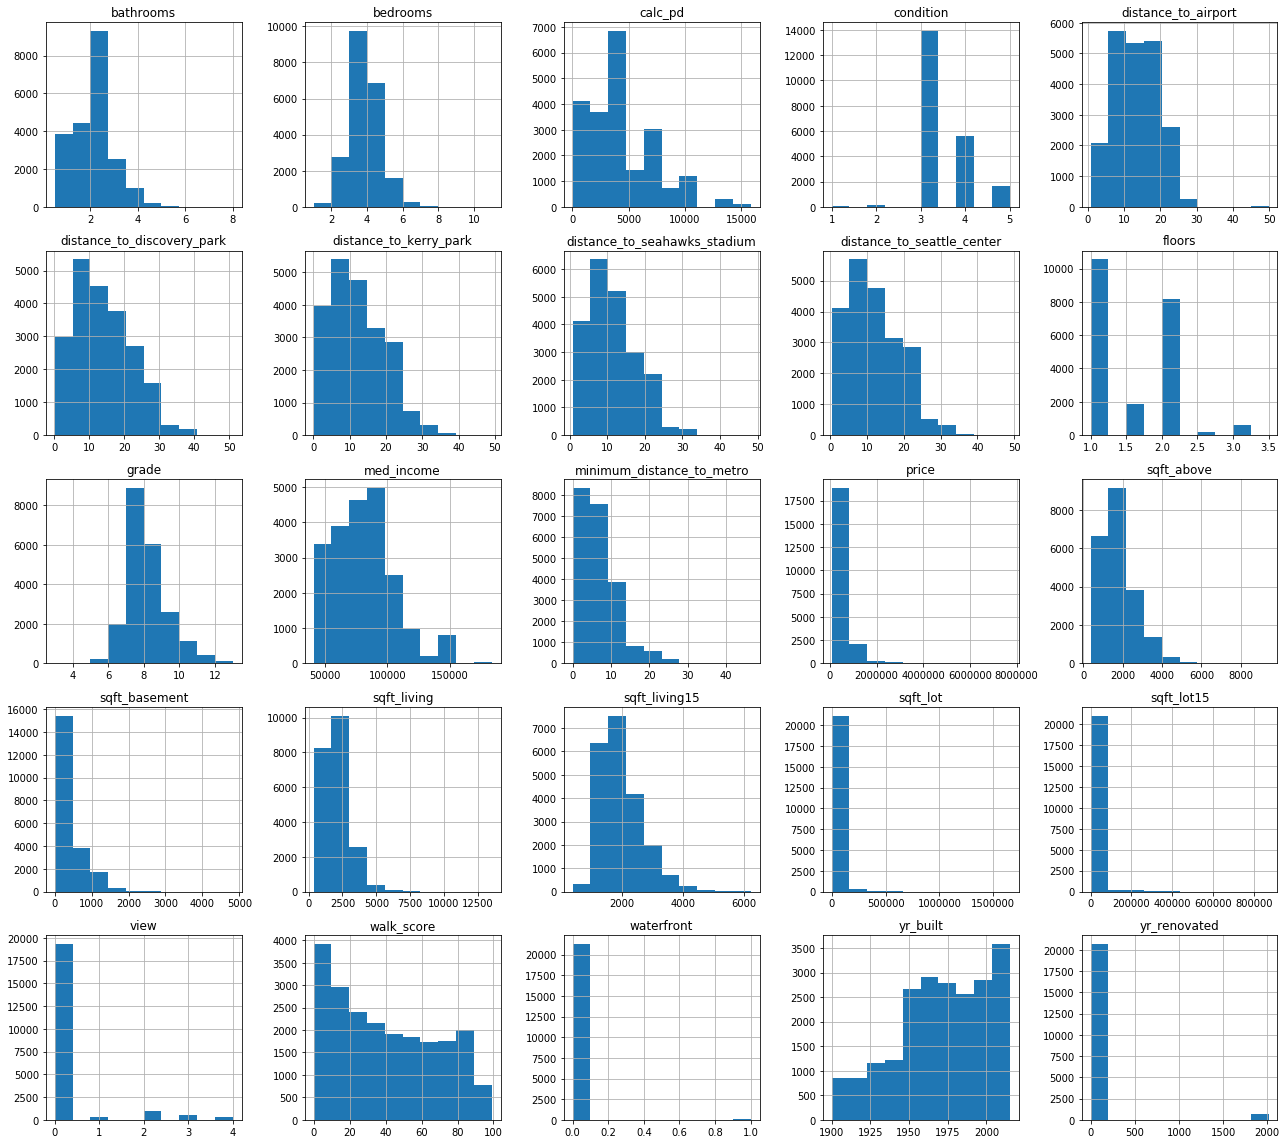

In [10]:
#check the distributions of each of the columns
df.hist(figsize=(18,16));
plt.tight_layout()

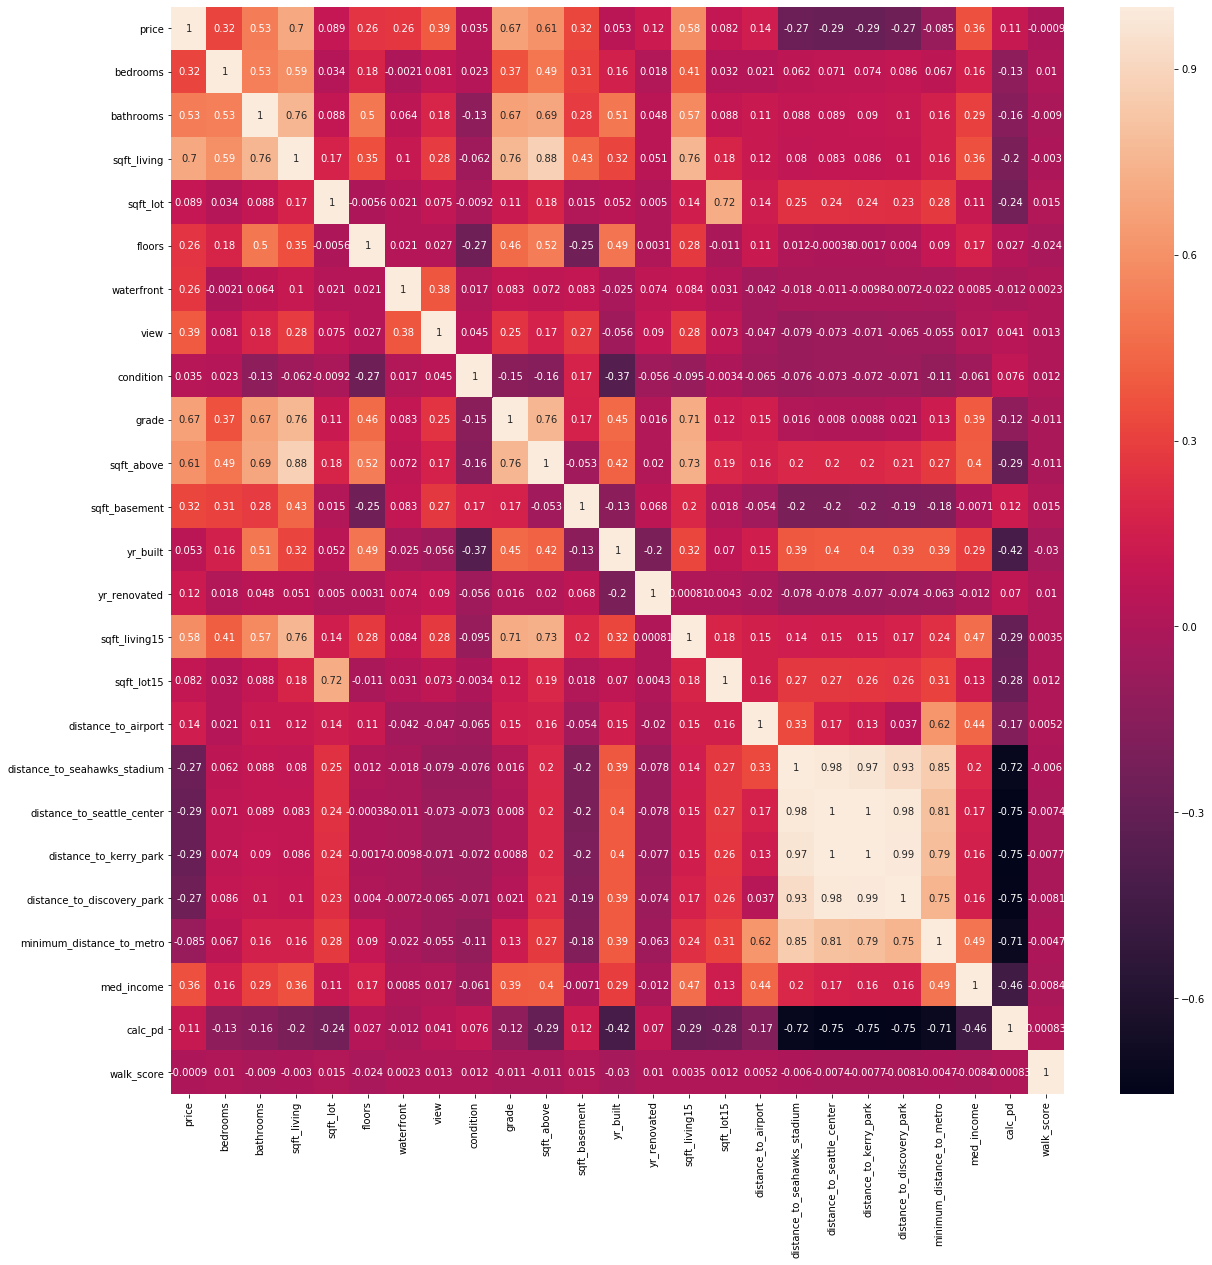

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

We'll use the `yr_built` column to calculate the age of the home and use age as a continuous variable.  We'll also create a new variable called `renovation_age` which is calculated in the same way.  If the house has not been renovated then it will have a renovation age equal to 0.

In [12]:
#create a function to calculate age
def calc_age(x):
    if x == 0:
        age = 0
    else:
        age = 2020 - x
    return age
df['renovation_age'] = df['yr_renovated'].map(calc_age)
df['home_age'] = df['yr_built'].map(calc_age)
df.drop(columns=['yr_built', 'yr_renovated'], inplace=True)
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,distance_to_seahawks_stadium,distance_to_seattle_center,distance_to_kerry_park,distance_to_discovery_park,minimum_distance_to_metro,med_income,calc_pd,walk_score,renovation_age,home_age
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,6.771217,8.837087,9.483657,12.249694,1.302968,58707.0,4967.42268,39,0.0,65
1,205425.0,2,1.00,880,6780,1.0,0.0,0.0,4,6,...,7.598140,9.663983,10.310590,13.074902,2.089548,58707.0,4967.42268,62,0.0,75
2,445000.0,3,2.25,2100,8201,1.0,0.0,2.0,3,8,...,7.222682,9.278340,9.927283,12.720516,1.894527,58707.0,4967.42268,23,0.0,53
3,236000.0,3,1.00,1300,5898,1.0,0.0,0.0,3,7,...,7.170015,9.237631,9.883293,12.639671,1.643102,58707.0,4967.42268,29,0.0,59
4,170000.0,2,1.00,860,5265,1.0,0.0,0.0,3,6,...,6.839175,8.907012,9.545065,12.244964,1.264256,58707.0,4967.42268,80,0.0,89


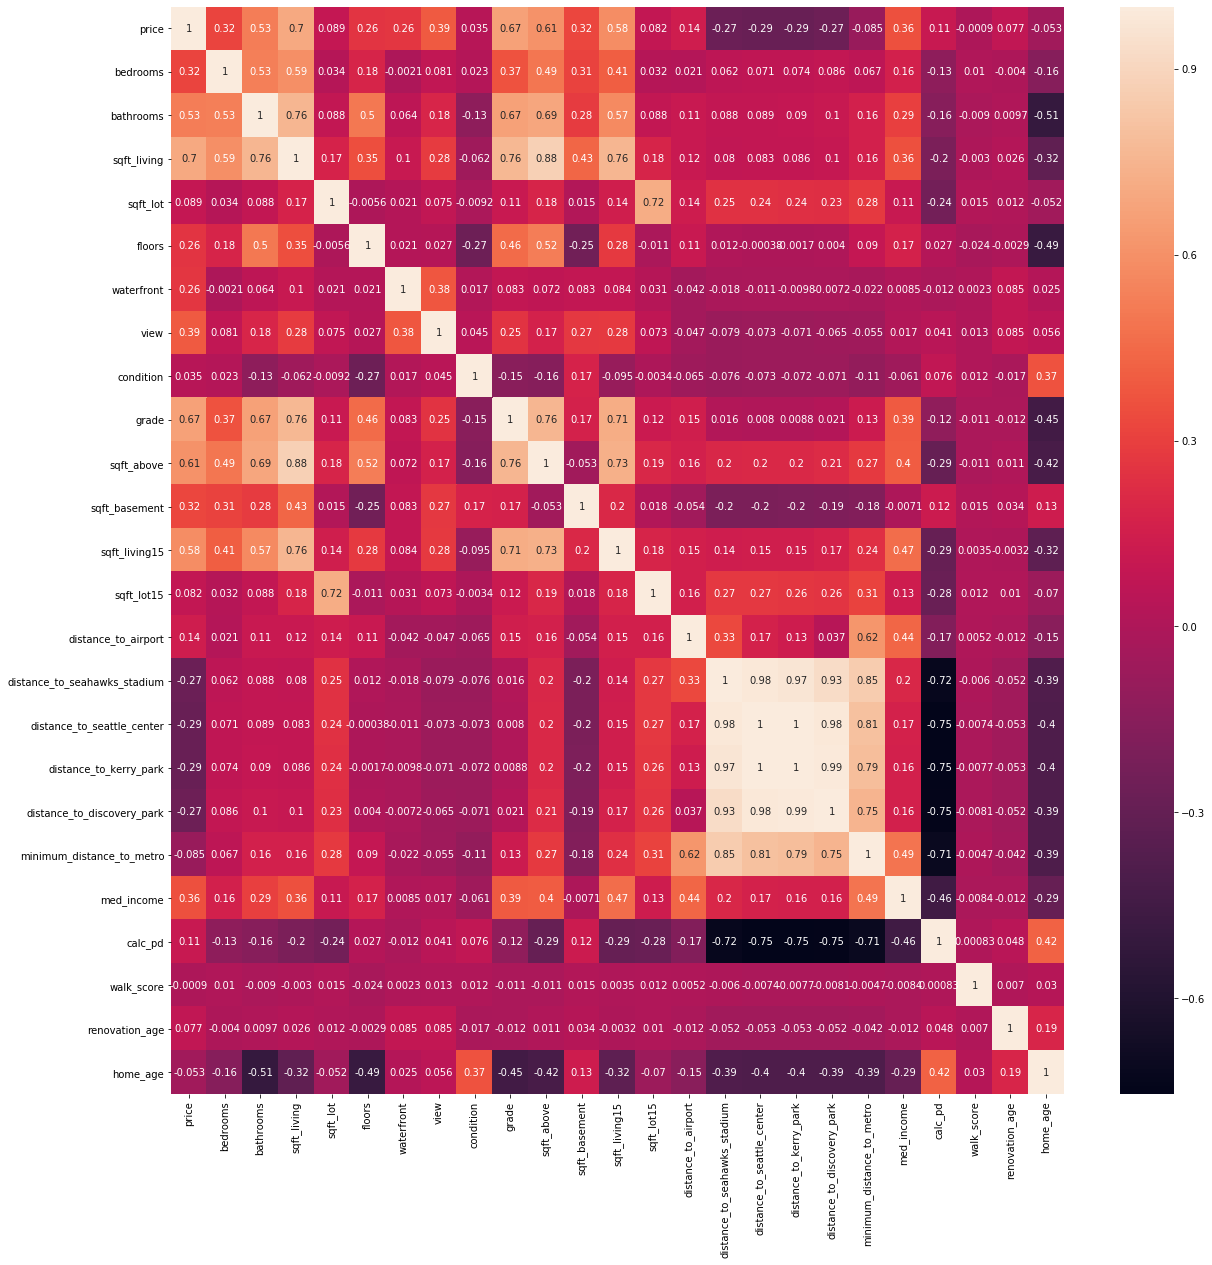

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

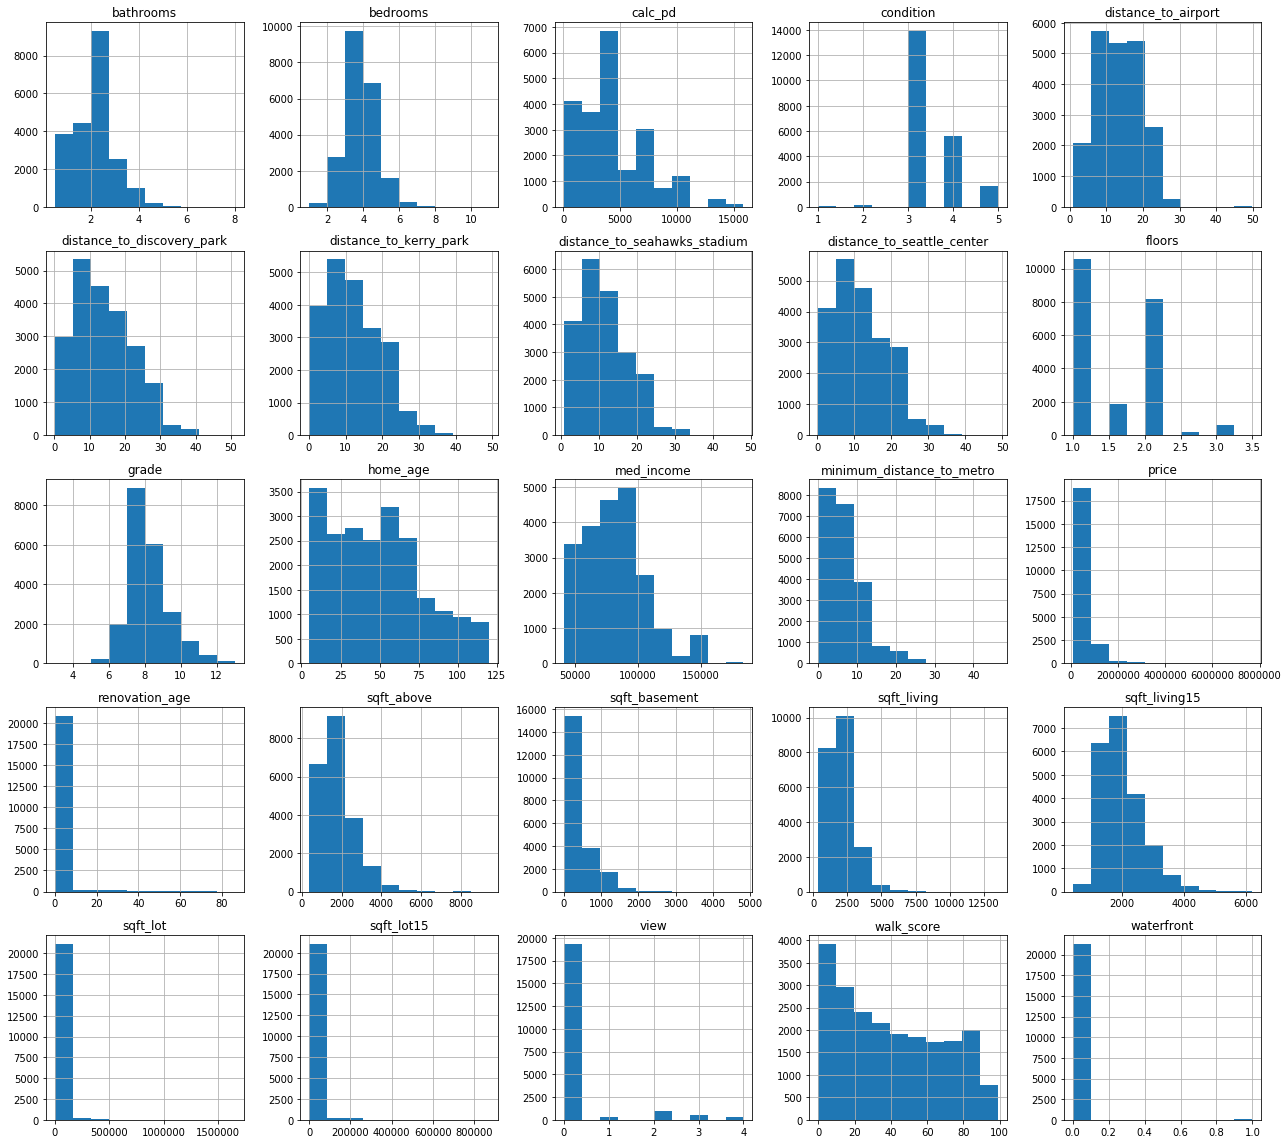

In [14]:
#check the distributions of each of the columns
df.hist(figsize=(18,16));
plt.tight_layout()

cont_cols = ['calc_pd', 'distance_to_airport', 'distance_to_discovery_park', 'distance_to_kerry_park',
            'distance_to_seahawks_stadium', 'distance_to_seattle_center', 'home_age', 'med_income',
            'minimum_distance_to_metro', 'renovation_age', 'sqft_above', 'sqft_basement', 'sqft_living',
            'sqft_living15', 'sqft_lot', 'sqft_lot15', 'walk_score']
plt.figure(figsize=(20,20))
for i in range(0, 20):
    plt.subplot(5, 4, i+1)
    if i > 16:
        break
    plt.scatter(df[cont_cols[i]], df['price'])
    plt.xlabel(cont_cols[i])
    plt.ylabel('Price')
plt.tight_layout()

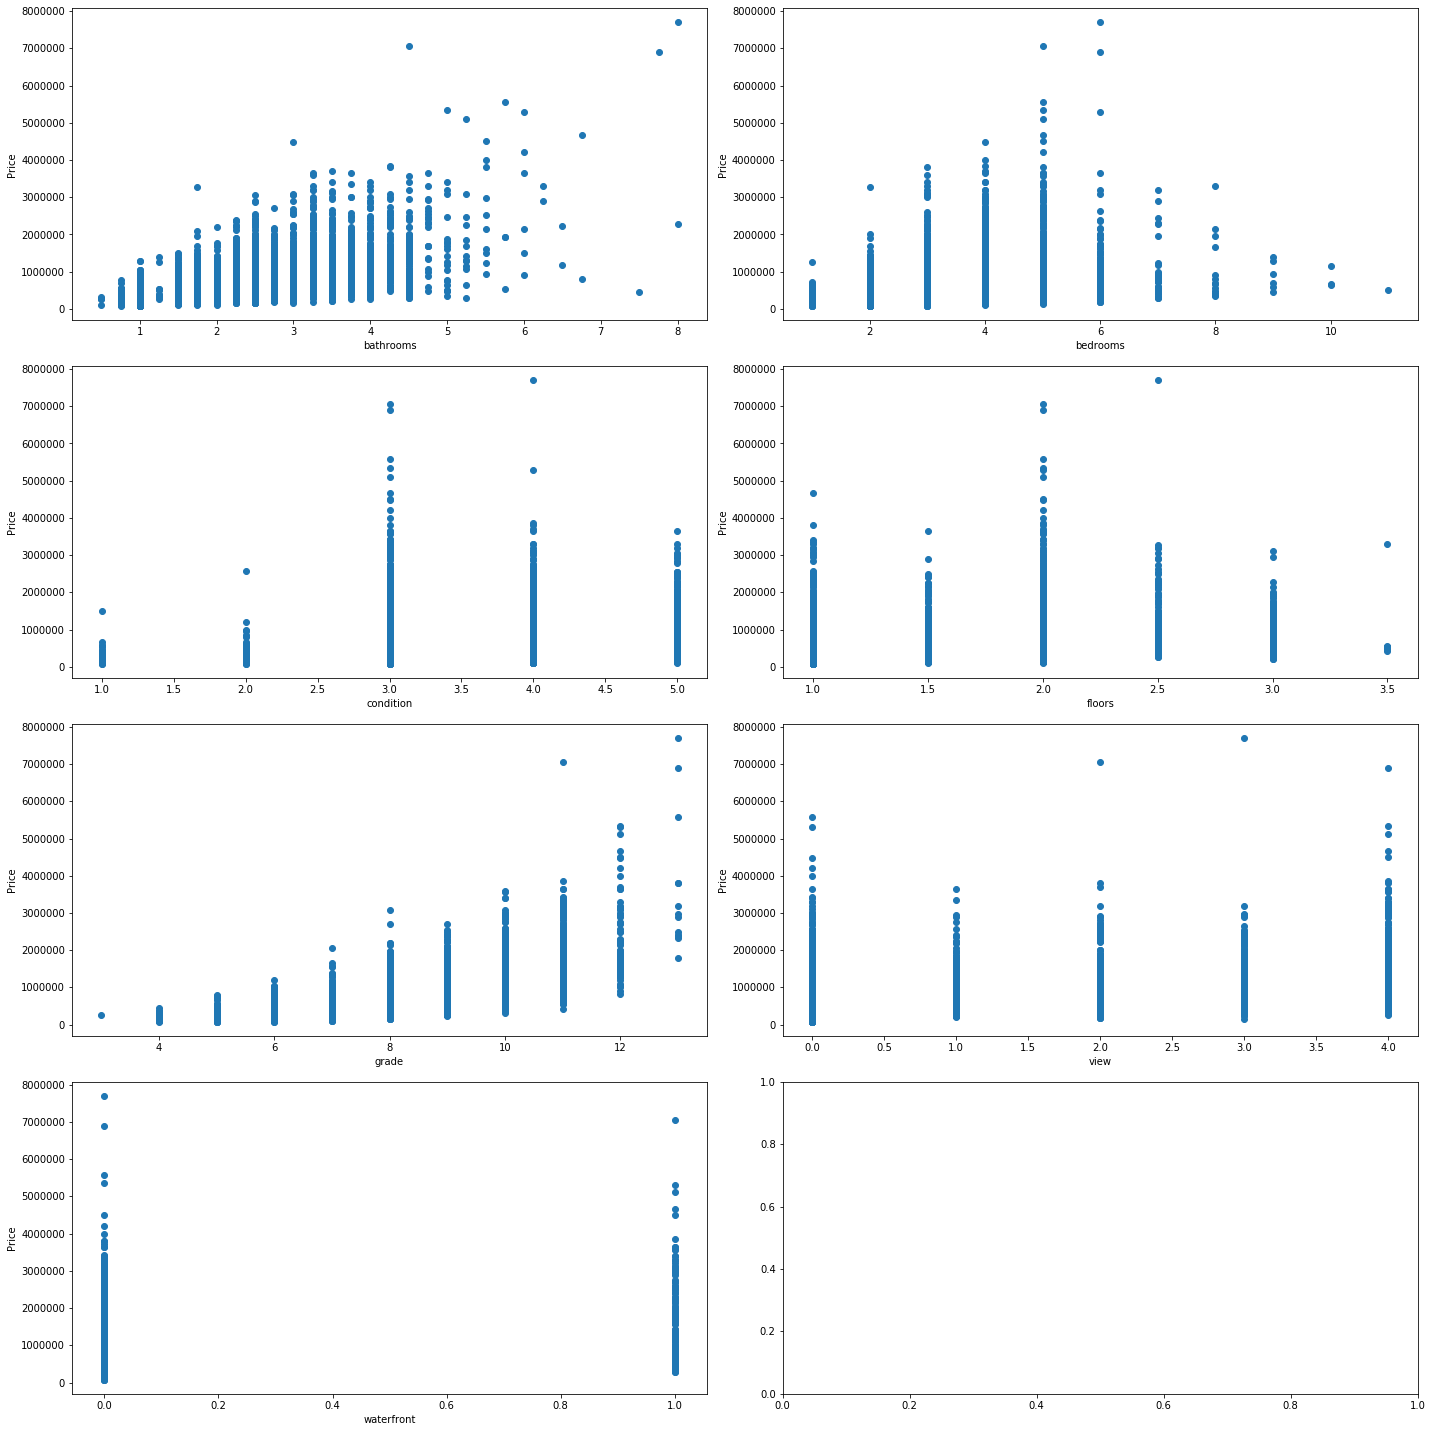

In [16]:
#cat_cols = ['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'view', 'waterfront']
#plt.figure(figsize=(20,20))
#for i in range(0, 8):
 #   plt.subplot(4, 2, i+1)
  #  if i > 6:
   #     break
    #plt.scatter(df[cat_cols[i]], df['price'])
    #plt.xlabel(cat_cols[i])
    #plt.ylabel('Price')
#plt.tight_layout()

In [17]:
df.drop(columns=['condition', 'distance_to_discovery_park', 'distance_to_kerry_park', 
                'distance_to_seahawks_stadium', 'minimum_distance_to_metro', 'renovation_age',
                'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'view', 'waterfront'], inplace=True)


In [18]:
df.drop(columns='grade', inplace=True)

In [19]:
X = df.drop(columns=['price'])
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X.columns, vif))

[('bedrooms', 22.504268965485988),
 ('bathrooms', 27.601930710524314),
 ('floors', 17.225835210782723),
 ('sqft_above', 15.106112260980087),
 ('sqft_basement', 2.462652822445924),
 ('distance_to_airport', 7.903122805950651),
 ('distance_to_seattle_center', 6.19740171117242),
 ('med_income', 16.610915603123008),
 ('calc_pd', 7.544973205673325),
 ('walk_score', 2.9050641896198606),
 ('home_age', 6.161623682172807)]

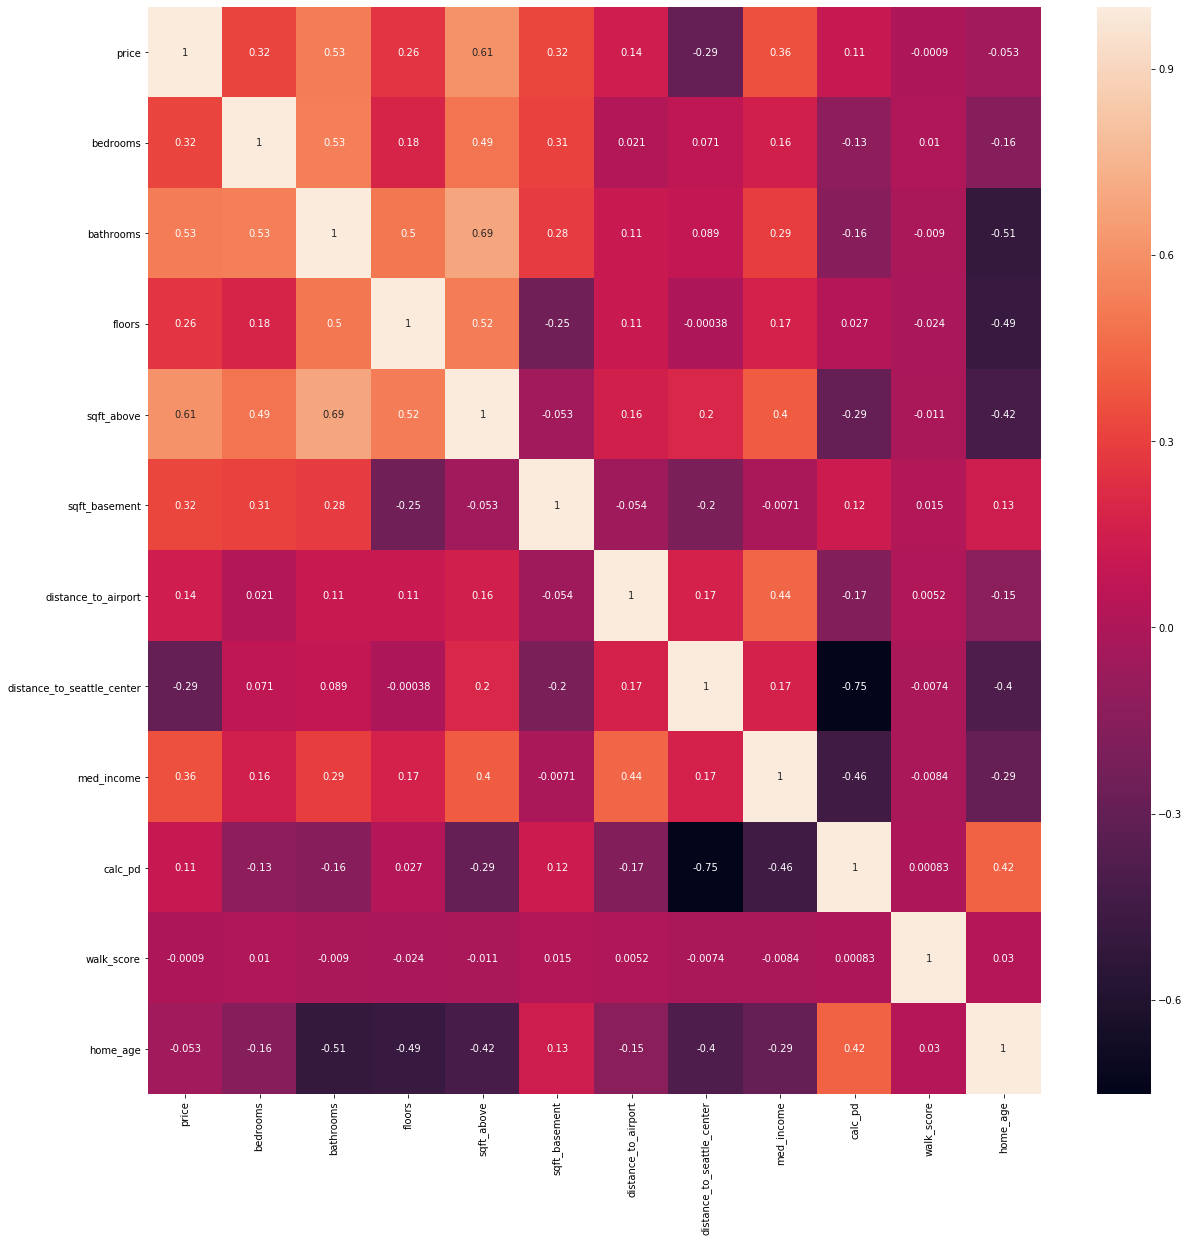

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

In [21]:
#df.groupby('grade')['price'].describe()

In [22]:
#df.groupby('grade').count()

In [23]:
#df.loc[df['grade'] <= 5, 'grade'] = 1
#df.loc[(df['grade'] > 5) & (df['grade'] <=7) , 'grade'] = 2
#df.loc[(df['grade'] > 7) & (df['grade'] <=10) , 'grade'] = 3
#df.loc[(df['grade'] > 10) & (df['grade'] <=13) , 'grade'] = 4

In [24]:
df['bed_bath'] = df['bedrooms'] / df['bathrooms']

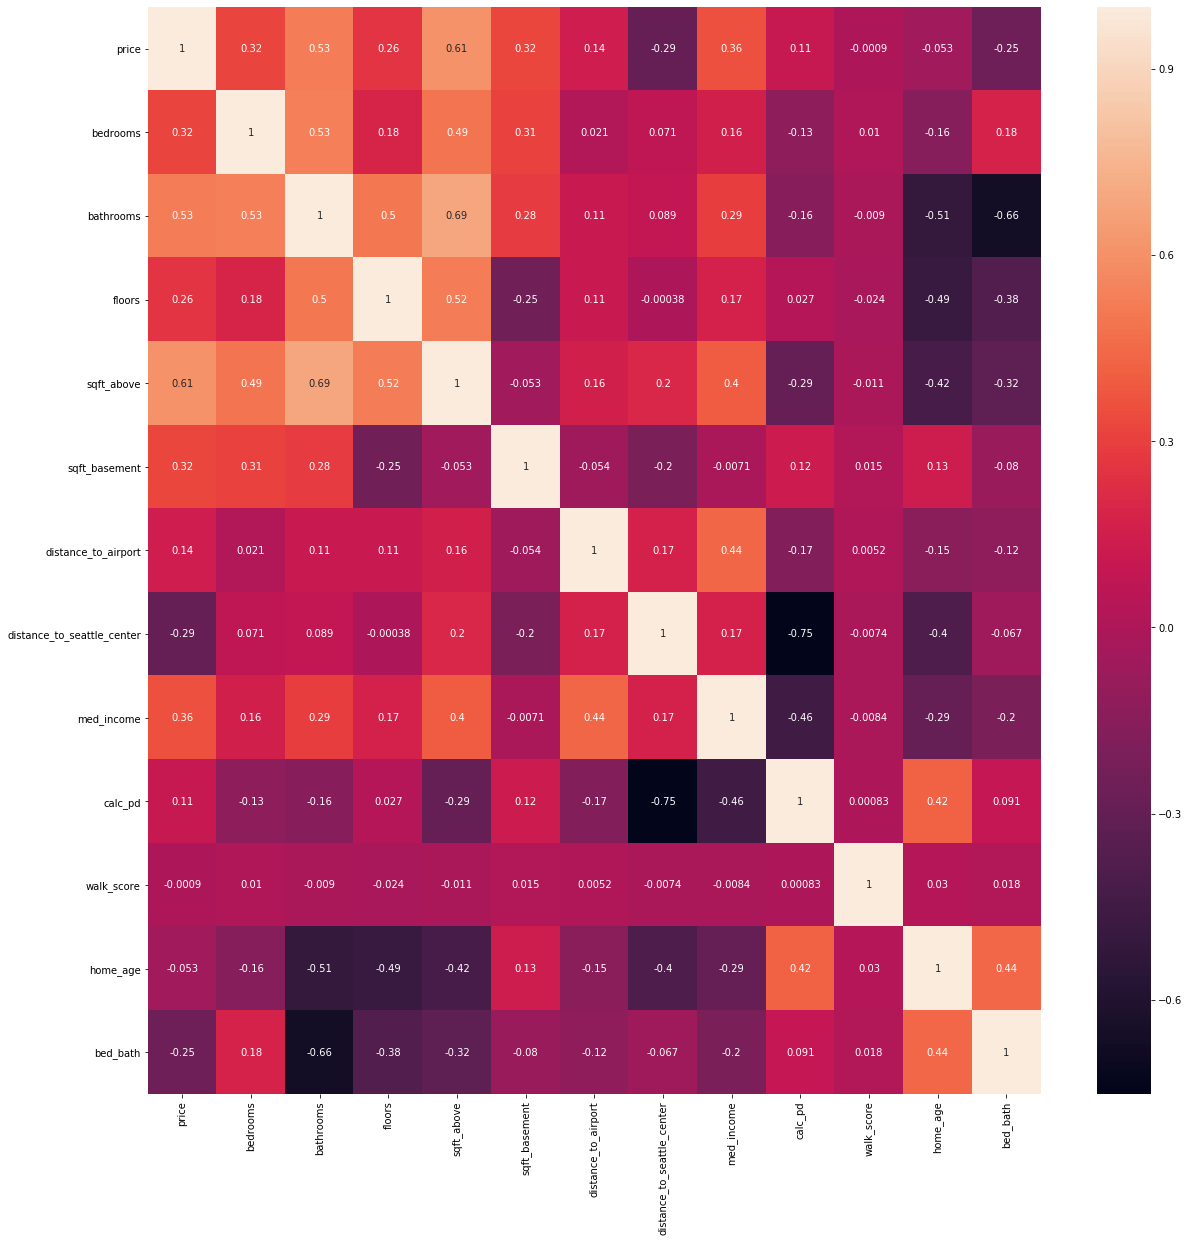

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

In [26]:
df.drop(columns=['bedrooms', 'bathrooms'], inplace=True)

In [27]:
#grade_cat = df['grade'].astype('category')
#lb = LabelBinarizer()
#grade_dummies = lb.fit_transform(grade_cat)

#grade_dum_df = pd.DataFrame(grade_dummies,columns=lb.classes_)
#grade_dum_df

In [28]:
#grade_dum_df.rename(columns={1:'grade_one', 2:'grade_two', 3:'grade_three',4:'grade_four'}, inplace=True)

In [29]:
#df = pd.concat([df, grade_dum_df], axis=1)
#df.drop(columns=['grade'], inplace=True)

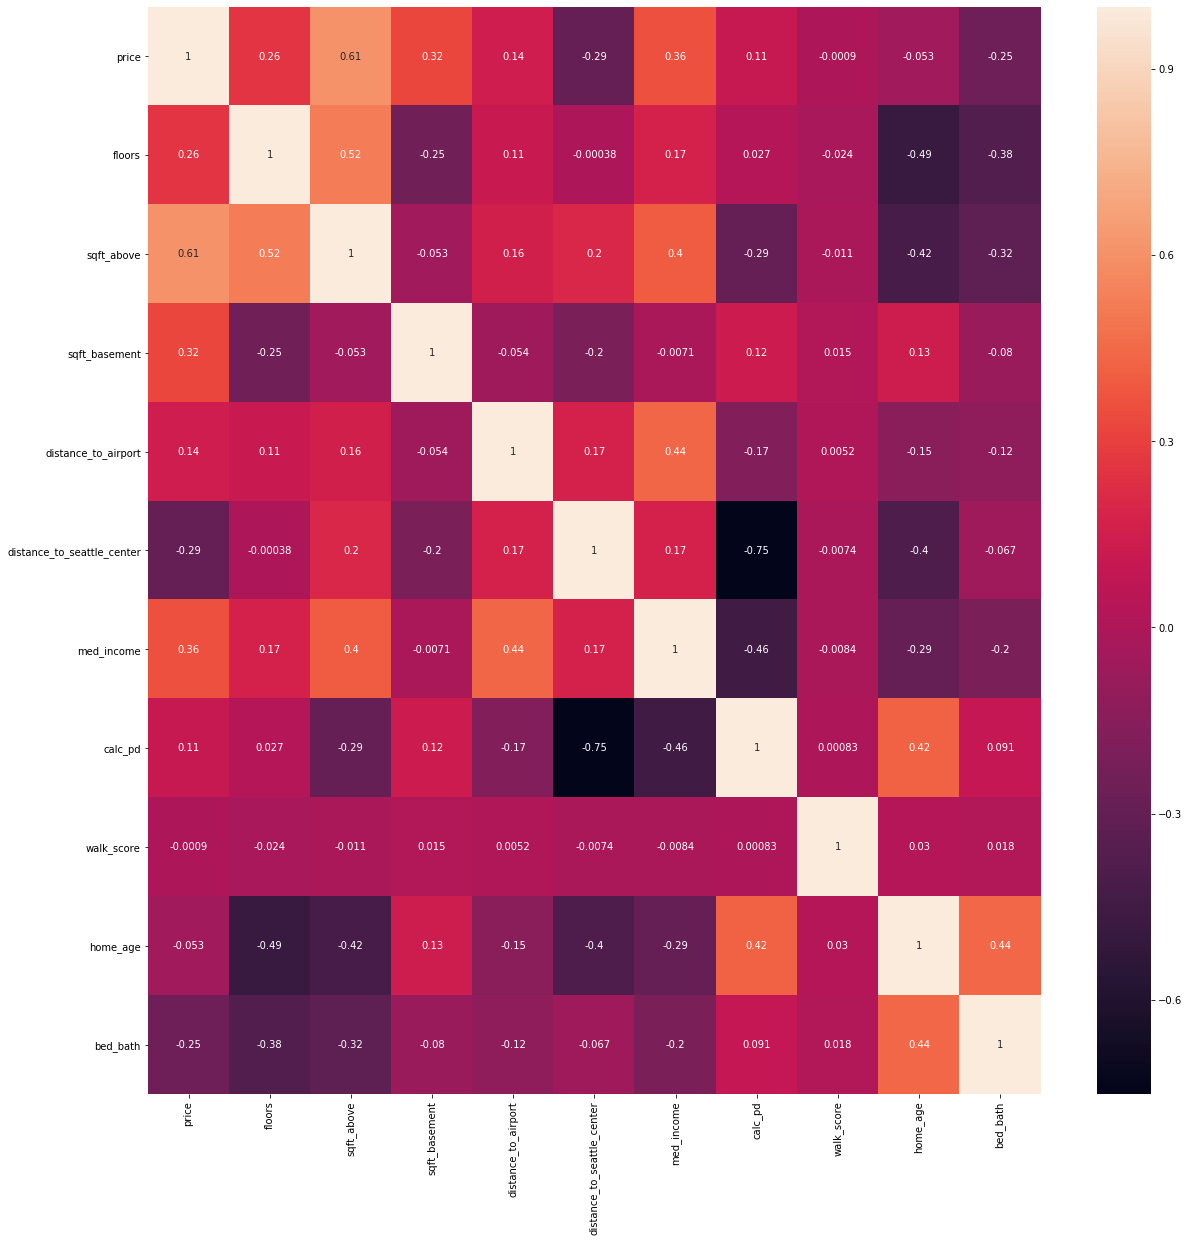

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);


In [31]:
df.loc[df['floors'] <= 1.5, 'floors'] = 1
df.loc[(df['floors'] > 1.5) & (df['floors'] <=2.5) , 'floors'] = 2
df.loc[df['floors'] > 2.5, 'floors'] = 3

In [32]:
floors_cat = df['floors'].astype('category')
lb = LabelBinarizer()
floors_dummies = lb.fit_transform(floors_cat)

floors_dum_df = pd.DataFrame(floors_dummies,columns=lb.classes_)
floors_dum_df

,1.0,2.0,3.0
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
21415,0,1,0
21416,0,1,0
21417,0,1,0
21418,0,1,0


In [33]:
df = pd.concat([df, floors_dum_df], axis=1)
df.drop(columns=['floors'], inplace=True)
#df.drop(columns=['grade_two'], inplace=True)

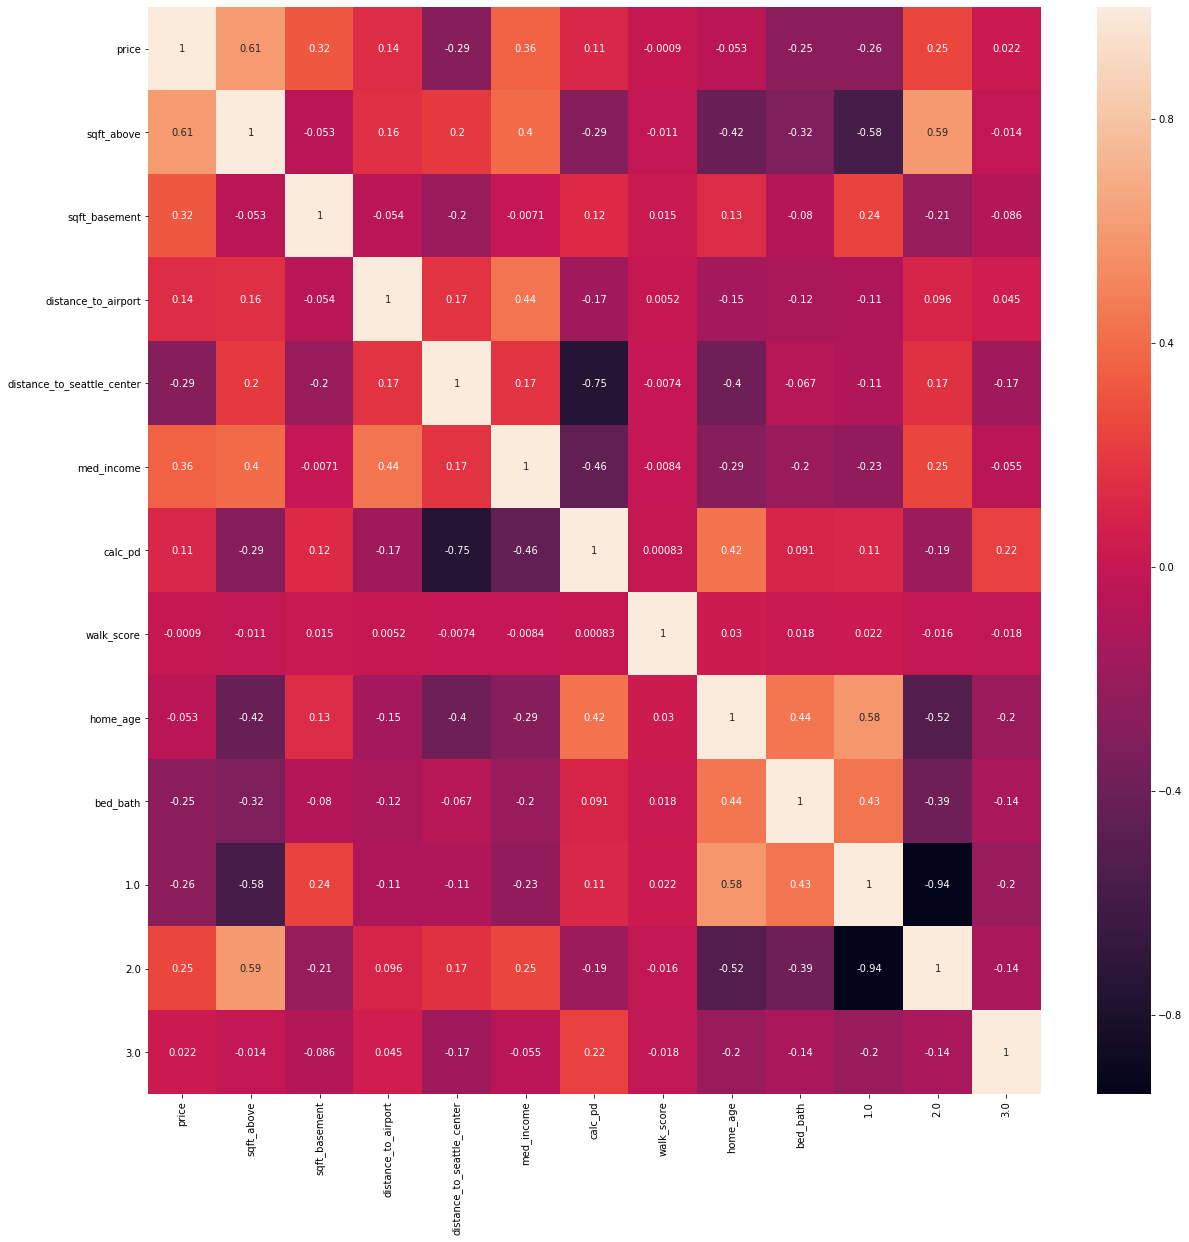

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

In [35]:
df.rename(columns={1:'one_story', 2:'two_story', 3:'three_story'}, inplace=True)
df.drop(columns=['one_story'], inplace=True)

In [36]:
X = df.drop(columns=['price'])
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X.columns, vif))

[('sqft_above', 9.919105823615263),
 ('sqft_basement', 1.6260517473706375),
 ('distance_to_airport', 7.939805713138436),
 ('distance_to_seattle_center', 5.8208344742221705),
 ('med_income', 15.605663010954656),
 ('calc_pd', 6.08837010378849),
 ('walk_score', 2.897277899077695),
 ('home_age', 7.859395150131898),
 ('bed_bath', 9.836805751626011),
 ('two_story', 3.64921952092453),
 ('three_story', 1.4227808171295109)]

In [37]:
outcome = 'price'
predictors = df.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [38]:
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     3826.
Date:                Sat, 12 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:10:08   Log-Likelihood:            -2.9326e+05
No. Observations:               21420   AIC:                         5.865e+05
Df Residuals:                   21408   BIC:                         5.866e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -2.171e+05   1.35e+04    -16.059      0.000   -2.44e+05   -1.91e+05
sqft_above                   299.7186      2.363    126.828      0.000     295.087     304.351
sqft_basement                216.7234      3.577     60.591      0.000     209.713     223.734
distance_to_airport         2510.9238    282.283      8.895      0.000    1957.627    3064.220
distance_to_seattle_center -1.431e+04    343.594    -41.662      0.000    -1.5e+04   -1.36e+04
med_income                     3.1303      0.084     37.362      0.000       2.966       3.294
calc_pd                       15.0546      0.918     16.396      0.000      13.255      16.854
walk_score                    -9.3193     51.162     -0.182      0.855    -109.602      90.963
home_age                    1264.0536     73.723     17.146      0.000    1119.550    1408.557
bed_bath                   -3.809e+04   2657.664    -14.333      0.000   -4.33e+04   -3.29e+04
two_story                  -4.278e+04   4510.967     -9.484      0.000   -5.16e+04   -3.39e+04
three_story                -1.973e+04   1.04e+04     -1.902      0.057   -4.01e+04     605.874
==============================================================================
Omnibus:                    19032.920   Durbin-Watson:                   1.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1591575.887
Skew:                           3.917   Prob(JB):                         0.00
Kurtosis:                      44.496   Cond. No.                     8.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

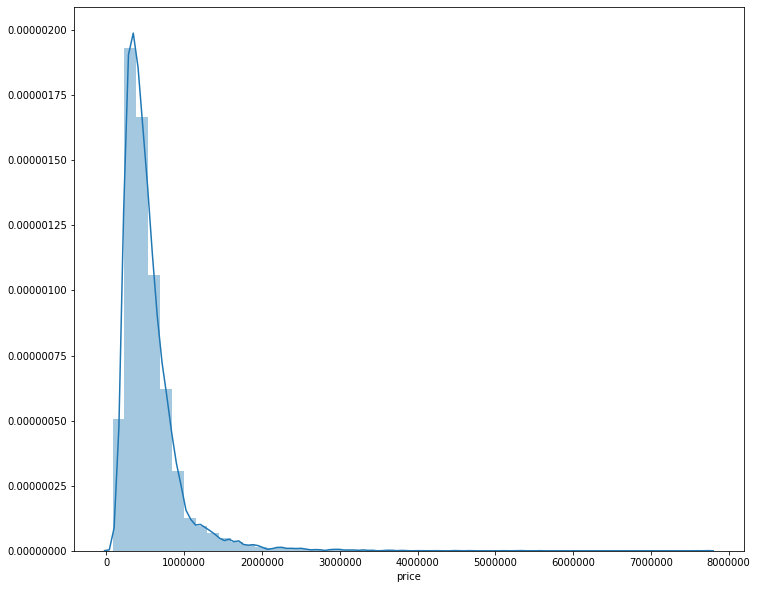

In [39]:
plt.figure(figsize=(12,10))
sns.distplot(df['price'])

In [40]:
df['price'].describe()

count    2.142000e+04
mean     5.407393e+05
std      3.679311e+05
min      7.800000e+04
25%      3.225000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [41]:
import scipy.stats as stats
df_no_outliers = df[np.abs(df.price-df.price.mean())<=(3*df.price.std())]

In [42]:
df_no_outliers['price'].describe()

count    2.101700e+04
mean     5.073653e+05
std      2.596603e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.470000e+05
75%      6.290000e+05
max      1.640000e+06
Name: price, dtype: float64

In [43]:
df_no_outliers

,price,sqft_above,sqft_basement,distance_to_airport,distance_to_seattle_center,med_income,calc_pd,walk_score,home_age,bed_bath,two_story,three_story
0,221900.0,1180,0,4.862539,8.837087,58707.0,4967.422680,39,65,3.000000,0,0
1,205425.0,880,0,4.514162,9.663983,58707.0,4967.422680,62,75,2.000000,0,0
2,445000.0,1620,480,5.076186,9.278340,58707.0,4967.422680,23,53,1.333333,0,0
3,236000.0,1300,0,4.564977,9.237631,58707.0,4967.422680,29,59,3.000000,0,0
4,170000.0,860,0,4.147126,8.907012,58707.0,4967.422680,80,89,2.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21402,1620000.0,2350,0,12.427488,5.404777,183833.0,2063.194444,60,43,1.777778,1,0
21404,1200000.0,2150,0,13.113193,5.462605,183833.0,2063.194444,0,67,1.333333,1,0
21407,1450000.0,3090,0,12.440391,5.451478,183833.0,2063.194444,31,67,1.818182,0,0
21410,1350000.0,1590,480,11.910712,5.280027,183833.0,2063.194444,33,74,1.500000,0,0


In [44]:
df_no_outliers['price'].describe()

count    2.101700e+04
mean     5.073653e+05
std      2.596603e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.470000e+05
75%      6.290000e+05
max      1.640000e+06
Name: price, dtype: float64

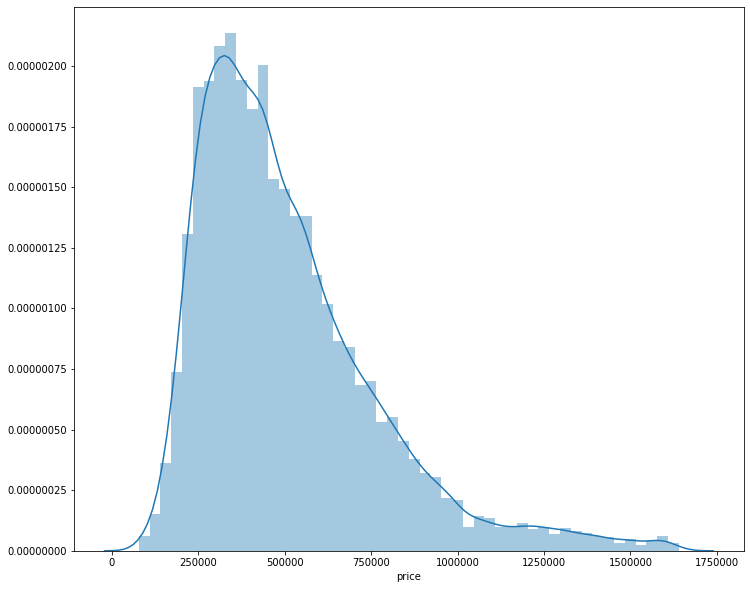

In [45]:
plt.figure(figsize=(12,10))
sns.distplot(df_no_outliers['price'])

In [46]:
df_no_outliers.isna().sum()

price                         0
sqft_above                    0
sqft_basement                 0
distance_to_airport           0
distance_to_seattle_center    0
med_income                    0
calc_pd                       0
walk_score                    0
home_age                      0
bed_bath                      0
two_story                     0
three_story                   0
dtype: int64

In [47]:
outcome = 'price'
predictors_no_outliers = df_no_outliers.drop('price', axis=1)
pred_sum_no_outliers = '+'.join(predictors_no_outliers.columns)
formula2 = outcome + '~' + pred_sum_no_outliers

In [48]:
model2 = ols(formula=formula2, data=df_no_outliers).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     4504.
Date:                Sat, 12 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:10:11   Log-Likelihood:            -2.7911e+05
No. Observations:               21017   AIC:                         5.582e+05
Df Residuals:                   21005   BIC:                         5.583e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -1.04e+05   9106.220    -11.418      0.000   -1.22e+05   -8.61e+04
sqft_above                   216.2547      1.714    126.164      0.000     212.895     219.614
sqft_basement                155.5572      2.489     62.489      0.000     150.678     160.436
distance_to_airport         3594.5975    189.066     19.012      0.000    3224.014    3965.181
distance_to_seattle_center -1.227e+04    230.078    -53.325      0.000   -1.27e+04   -1.18e+04
med_income                     3.0328      0.057     53.344      0.000       2.921       3.144
calc_pd                       13.9168      0.615     22.638      0.000      12.712      15.122
walk_score                    21.2350     34.244      0.620      0.535     -45.885      88.355
home_age                     897.0345     49.931     17.965      0.000     799.165     994.904
bed_bath                   -3.081e+04   1770.866    -17.400      0.000   -3.43e+04   -2.73e+04
two_story                  -1.498e+04   3053.170     -4.905      0.000    -2.1e+04   -8992.199
three_story                -1.922e+04   6990.665     -2.749      0.006   -3.29e+04   -5518.457
==============================================================================
Omnibus:                     6037.256   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26654.460
Skew:                           1.346   Prob(JB):                         0.00
Kurtosis:                       7.816   Cond. No.                     8.01e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

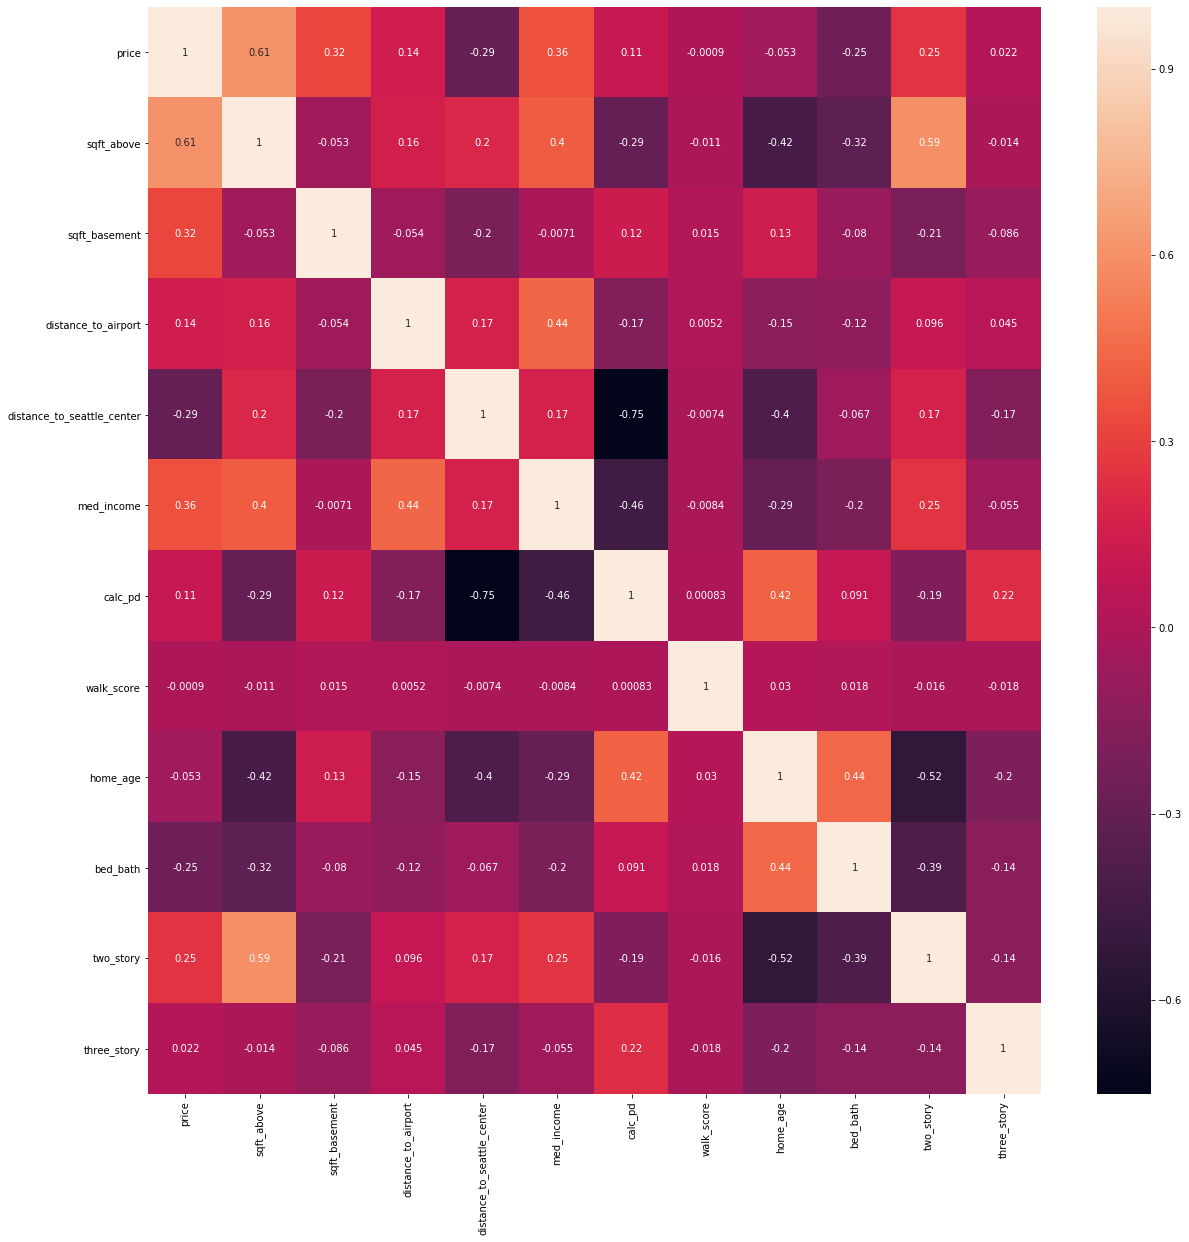

In [49]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

In [50]:
df_pop_den = df_no_outliers.drop(columns=['distance_to_seattle_center'])
df_sea_center = df_no_outliers.drop(columns=['calc_pd'])

In [51]:
outcome = 'price'
predictors_pop_den = df_pop_den.drop('price', axis=1)
pred_sum_pop_den = '+'.join(predictors_pop_den.columns)
formula3 = outcome + '~' + pred_sum_pop_den

In [52]:
model3 = ols(formula=formula3, data=df_pop_den).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     4114.
Date:                Sat, 12 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:10:14   Log-Likelihood:            -2.8045e+05
No. Observations:               21017   AIC:                         5.609e+05
Df Residuals:                   21006   BIC:                         5.610e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -4.3e+05   7189.826    -59.813      0.000   -4.44e+05   -4.16e+05
sqft_above            211.9647      1.824    116.186      0.000     208.389     215.541
sqft_basement         173.3307      2.629     65.941      0.000     168.179     178.483
distance_to_airport  1546.1445    197.250      7.838      0.000    1159.519    1932.770
med_income              4.0933      0.057     72.127      0.000       3.982       4.205
calc_pd                36.8211      0.469     78.574      0.000      35.903      37.740
walk_score             40.0492     36.485      1.098      0.272     -31.464     111.563
home_age             1299.1489     52.592     24.702      0.000    1196.064    1402.234
bed_bath            -3.091e+04   1886.881    -16.380      0.000   -3.46e+04   -2.72e+04
two_story           -8751.5952   3250.815     -2.692      0.007   -1.51e+04   -2379.747
three_story          1.162e+04   7423.107      1.566      0.117   -2926.937    2.62e+04
==============================================================================
Omnibus:                     5534.580   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22612.618
Skew:                           1.252   Prob(JB):                         0.00
Kurtosis:                       7.421   Cond. No.                     6.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_no_outliers = predictors_no_outliers
vif = [variance_inflation_factor(X_no_outliers.values, i) for i in range(X_no_outliers.shape[1])]
list(zip(predictors_no_outliers.columns, vif))

[('sqft_above', 10.913523008500324),
 ('sqft_basement', 1.6138219663030942),
 ('distance_to_airport', 7.9622601764658745),
 ('distance_to_seattle_center', 5.997152055138758),
 ('med_income', 16.021065858476607),
 ('calc_pd', 6.114586968771095),
 ('walk_score', 2.8993306447507807),
 ('home_age', 8.009997141617562),
 ('bed_bath', 9.889879814273462),
 ('two_story', 3.6700444303710524),
 ('three_story', 1.4307237304949059)]

In [54]:
df_trial4 = df_no_outliers.drop(columns=['med_income'])

In [55]:
X_no_outliers = df_trial4.drop(columns=['price'])
vif = [variance_inflation_factor(X_no_outliers.values, i) for i in range(X_no_outliers.shape[1])]
list(zip(X_no_outliers.columns, vif))

[('sqft_above', 9.2749899682049),
 ('sqft_basement', 1.5622496286838772),
 ('distance_to_airport', 5.866300433008254),
 ('distance_to_seattle_center', 5.974592228662361),
 ('calc_pd', 5.970150854450232),
 ('walk_score', 2.875409690599135),
 ('home_age', 7.810760482928134),
 ('bed_bath', 9.41752818387221),
 ('two_story', 3.6081526740133136),
 ('three_story', 1.4163561724921854)]

In [81]:
df_trial5 = df_no_outliers.drop(columns=['med_income', 'home_age'])
X_no_outliers = df_trial5.drop(columns=['price'])
vif = [variance_inflation_factor(X_no_outliers.values, i) for i in range(X_no_outliers.shape[1])]
list(zip(X_no_outliers.columns, vif))

[('sqft_above', 9.202441697378157),
 ('sqft_basement', 1.561219419235317),
 ('distance_to_airport', 5.80245655723483),
 ('distance_to_seattle_center', 5.971251287090669),
 ('calc_pd', 4.514241281042079),
 ('walk_score', 2.859446316438571),
 ('bed_bath', 7.698528349649504),
 ('two_story', 3.116233871981224),
 ('three_story', 1.2165241886898681)]

In [82]:
df_trial5.head()

,price,sqft_above,sqft_basement,distance_to_airport,distance_to_seattle_center,calc_pd,walk_score,bed_bath,two_story,three_story
0,221900.0,1180,0,4.862539,8.837087,4967.42268,39,3.000000,0,0
1,205425.0,880,0,4.514162,9.663983,4967.42268,62,2.000000,0,0
2,445000.0,1620,480,5.076186,9.278340,4967.42268,23,1.333333,0,0
3,236000.0,1300,0,4.564977,9.237631,4967.42268,29,3.000000,0,0
4,170000.0,860,0,4.147126,8.907012,4967.42268,80,2.000000,0,0


In [83]:
df_trial5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21017 entries, 0 to 21412
Data columns (total 10 columns):
price                         21017 non-null float64
sqft_above                    21017 non-null int64
sqft_basement                 21017 non-null int64
distance_to_airport           21017 non-null float64
distance_to_seattle_center    21017 non-null float64
calc_pd                       21017 non-null float64
walk_score                    21017 non-null int64
bed_bath                      21017 non-null float64
two_story                     21017 non-null int64
three_story                   21017 non-null int64
dtypes: float64(5), int64(5)
memory usage: 1.8 MB


In [84]:
#log transformation
for x in ['price', 'sqft_above', 'distance_to_airport', 'distance_to_seattle_center',
         'calc_pd', 'bed_bath']:
    df_trial5[x] = df_trial5[x].map(lambda j: np.log(j))

In [85]:
df_trial5['sqft_basement'] = df_trial5['sqft_basement'].map(lambda x: np.log(x+1))
df_trial5['walk_score'] = df_trial5['walk_score'].map(lambda x: np.log(x+1))

In [86]:
df_trial5.head()

,price,sqft_above,sqft_basement,distance_to_airport,distance_to_seattle_center,calc_pd,walk_score,bed_bath,two_story,three_story
0,12.309982,7.073270,0.000000,1.581561,2.178957,8.510656,3.688879,1.098612,0,0
1,12.232836,6.779922,0.000000,1.507220,2.268406,8.510656,4.143135,0.693147,0,0
2,13.005830,7.390181,6.175867,1.624560,2.227683,8.510656,3.178054,0.287682,0,0
3,12.371587,7.170120,0.000000,1.518414,2.223285,8.510656,3.401197,1.098612,0,0
4,12.043554,6.756932,0.000000,1.422416,2.186839,8.510656,4.394449,0.693147,0,0


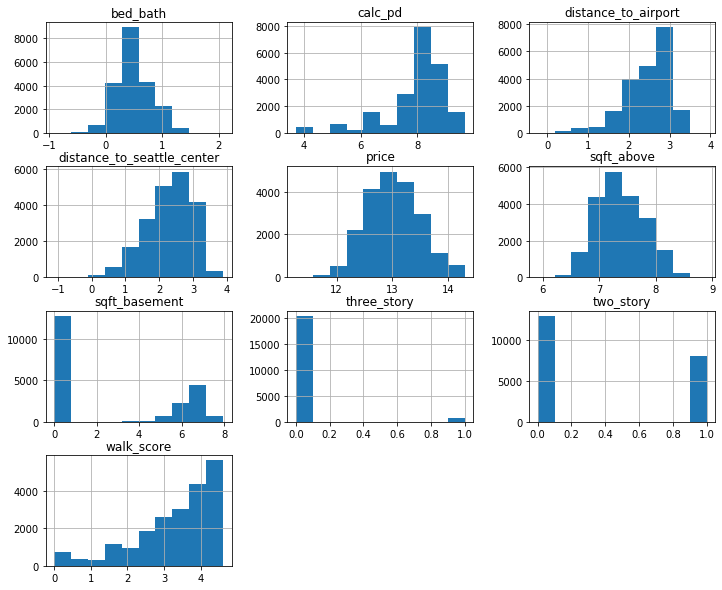

In [87]:

df_trial5.hist(figsize=(12,10));

In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_trial5)
scaled_df = pd.DataFrame(scaled)
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.343272,0.388549,0.000000,0.437551,0.658333,0.805118,0.801030,0.672591,0.0,0.0
1,0.317943,0.290271,0.000000,0.419590,0.676221,0.805118,0.899670,0.537244,0.0,0.0
2,0.571738,0.494722,0.776309,0.447940,0.668077,0.805118,0.690106,0.401896,0.0,0.0
3,0.363499,0.420996,0.000000,0.422294,0.667198,0.805118,0.738561,0.672591,0.0,0.0
4,0.255796,0.282569,0.000000,0.399101,0.659909,0.805118,0.954243,0.537244,0.0,0.0


In [89]:
df_trial5.columns

Index(['price', 'sqft_above', 'sqft_basement', 'distance_to_airport',
       'distance_to_seattle_center', 'calc_pd', 'walk_score', 'bed_bath',
       'two_story', 'three_story'],
      dtype='object')

In [90]:
column_dict = dict(zip(scaled_df.columns, df_trial5.columns))
column_dict

{0: 'price',
 1: 'sqft_above',
 2: 'sqft_basement',
 3: 'distance_to_airport',
 4: 'distance_to_seattle_center',
 5: 'calc_pd',
 6: 'walk_score',
 7: 'bed_bath',
 8: 'two_story',
 9: 'three_story'}

In [91]:
scaled_df.rename(columns=column_dict, inplace=True)
scaled_df.head()

,price,sqft_above,sqft_basement,distance_to_airport,distance_to_seattle_center,calc_pd,walk_score,bed_bath,two_story,three_story
0,0.343272,0.388549,0.000000,0.437551,0.658333,0.805118,0.801030,0.672591,0.0,0.0
1,0.317943,0.290271,0.000000,0.419590,0.676221,0.805118,0.899670,0.537244,0.0,0.0
2,0.571738,0.494722,0.776309,0.447940,0.668077,0.805118,0.690106,0.401896,0.0,0.0
3,0.363499,0.420996,0.000000,0.422294,0.667198,0.805118,0.738561,0.672591,0.0,0.0
4,0.255796,0.282569,0.000000,0.399101,0.659909,0.805118,0.954243,0.537244,0.0,0.0


In [92]:
df_trial5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21017 entries, 0 to 21412
Data columns (total 10 columns):
price                         21017 non-null float64
sqft_above                    21017 non-null float64
sqft_basement                 21017 non-null float64
distance_to_airport           21017 non-null float64
distance_to_seattle_center    21017 non-null float64
calc_pd                       21017 non-null float64
walk_score                    21017 non-null float64
bed_bath                      21017 non-null float64
two_story                     21017 non-null int64
three_story                   21017 non-null int64
dtypes: float64(8), int64(2)
memory usage: 1.8 MB


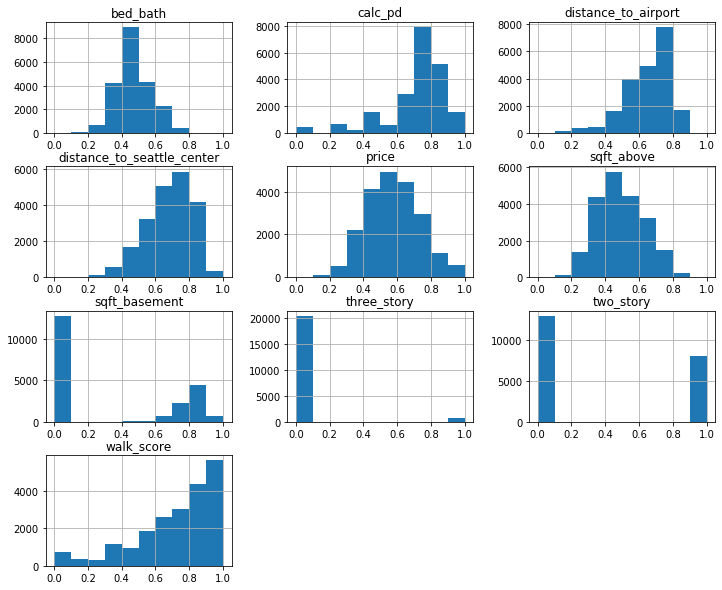

In [94]:
scaled_df.hist(figsize=(12,10));

In [96]:
outcome = 'price'
predictors = scaled_df.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum


model = ols(formula=formula, data=scaled_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     5800.
Date:                Sat, 12 Sep 2020   Prob (F-statistic):               0.00
Time:                        20:54:51   Log-Likelihood:                 21951.
No. Observations:               21017   AIC:                        -4.388e+04
Df Residuals:                   21007   BIC:                        -4.380e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.5076      0.009     53.592      0.000       0.489       0.526
sqft_above                     0.8357      0.006    149.343      0.000       0.825       0.847
sqft_basement                  0.0894      0.002     54.369      0.000       0.086       0.093
distance_to_airport            0.2706      0.005     57.382      0.000       0.261       0.280
distance_to_seattle_center    -0.6438      0.006   -100.405      0.000      -0.656      -0.631
calc_pd                       -0.0555      0.005    -11.963      0.000      -0.065      -0.046
walk_score                     0.0016      0.002      0.660      0.509      -0.003       0.006
bed_bath                      -0.1150      0.006    -18.867      0.000      -0.127      -0.103
two_story                     -0.0342      0.002    -20.279      0.000      -0.037      -0.031
three_story                   -0.0803      0.004    -20.695      0.000      -0.088      -0.073
==============================================================================
Omnibus:                      471.097   Durbin-Watson:                   1.278
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              856.149
Skew:                           0.175   Prob(JB):                    1.23e-186
Kurtosis:                       3.924   Cond. No.                         38.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

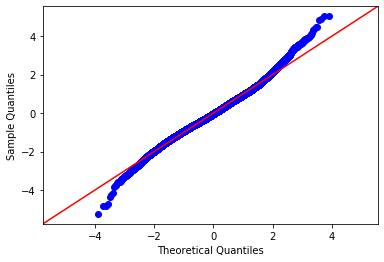

In [98]:
resid = model.resid
fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)

In [100]:
import statsmodels.stats.api as sms
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid.iloc[indices], model.model.exog[indices])
list(zip(name, test))

NameError: name 'indices' is not defined

ValueError: x and y must be the same size

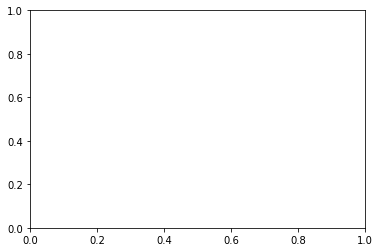

In [105]:
x_cols = ['sqft_above', 'distance_to_airport', 'distance_to_seattle_center',
         'calc_pd', 'bed_bath', 'walk_score', 'sqft_basement', 'two_story', 'three_story']
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]), [0 for i in range(len(scaled_df))])